In [2]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

MSE_multiclass1580961010.5670495 scaling is wrong:
aligns: 64 + 10 = 74
invs: 784 + 64 + 64 + 10 = 922

In [64]:
with open('Autoencode_1example_randinit1580965575.5510392.pkl', 'rb') as f:
    losses, aligns, invs, _ = pickle.load(f)

In [16]:
invs = [i*(2*(1024 + 64))/922 for i in invs]
aligns = [i*(1024 + 64)/74 for i in aligns]

In [62]:
aligns[0]

0.9996846914291382

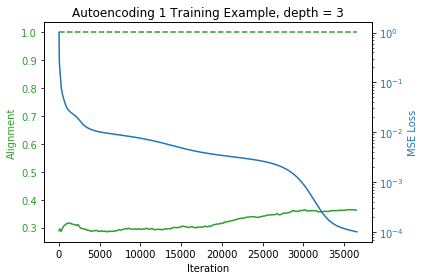

In [59]:
fig, ax1 = plt.subplots()

plt.title("Autoencoding 1 Training Example, depth = 3")

color = 'tab:green'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Alignment', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot([100*i for i in range(len(aligns))], aligns, color=color, label='Alignment')




plt.plot([0, 100*len(aligns)], [1.0, 1.0], '--', color='tab:green')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('MSE Loss', color=color)
ax2.plot(losses, color=color, label='Loss')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

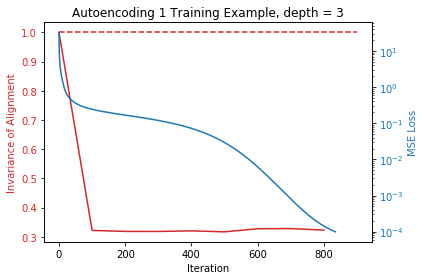

In [53]:
fig, ax1 = plt.subplots()

plt.title("MNIST Multiclass Classification, depth = 3")

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Invariance of Alignment', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot([100*i for i in range(len(invs))], invs, color=color, label='Invariance')




plt.plot([0, 100*len(invs)], [1.0, 1.0], '--', color='tab:red')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('MSE Loss', color=color)
ax2.plot(losses, color=color, label='Loss')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [74]:
def plot(losses, aligns, invs, title, loss_name):
    fig, ax1 = plt.subplots()

    plt.title(title)
    
    fontsize = 16

    color = 'tab:green'
    ax1.set_xlabel('Iteration', fontsize=fontsize)
    ax1.set_ylabel('Alignment', fontsize=fontsize)
    ln1 = ax1.plot([100*i for i in range(len(aligns))], aligns, color=color, label='Alignment')

                                                                                                                                            
    ax1.tick_params(axis='y')
    ax1.set_ylim(ymax=1.0)
#     ln2 = ax1.plot([100*i for i in range(len(invs))], invs, color='tab:red', label='Invariance')


    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel(loss_name, fontsize=fontsize)
    ln3 = ax2.plot(losses, color=color, label='Loss')
    ax2.set_yscale('log')
    ax2.tick_params(axis='y')
    
#     lns = ln1+ln2+ln3
    lns = ln1 + ln3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper right', bbox_to_anchor=(0.5, 0.5), prop={'size': 16})

    fig.tight_layout()
    plt.show()


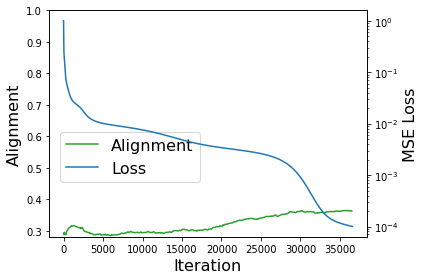

In [75]:
plot(losses, aligns, [], '', 'MSE Loss')